## Exploratory Data Analysis


In [1]:
# imports important library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv(
    "/Users/sushant/Desktop/Opsfree_intership_challange/Data/traces_data.csv"
)

In [3]:
# Display top 5 rows of dataframe

df.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano,Unnamed: 7
0,42:32.7,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477,NaN
1,42:32.7,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634,NaN
2,42:33.9,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000,NaN
3,42:36.9,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000,NaN
4,42:39.9,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000,NaN


In [4]:
# Basic info about datasets

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183615 entries, 0 to 183614
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Timestamp     183615 non-null  object
 1   traceID       183615 non-null  object
 2   spanID        183615 non-null  object
 3   parentSpanID  141834 non-null  object
 4   serviceName   183615 non-null  object
 5   Name          183615 non-null  object
 6   durationNano  183615 non-null  int64 
 7   Unnamed: 7    80498 non-null   object
dtypes: int64(1), object(7)
memory usage: 11.2+ MB


In [5]:
# Summary of statistics of  numerical column
df.describe()

,durationNano
count,1.836150e+05
mean,5.414918e+06
std,2.077879e+07
min,0.000000e+00
25%,3.357000e+05
50%,1.584906e+06
75%,6.832718e+06
max,4.999858e+09


In [6]:
# to check the missing value

df.isnull().sum()

Timestamp            0
traceID              0
spanID               0
parentSpanID     41781
serviceName          0
Name                 0
durationNano         0
Unnamed: 7      103117
dtype: int64

In [7]:
# Check the null value
df.isnull().value_counts()

Timestamp  traceID  spanID  parentSpanID  serviceName  Name   durationNano  Unnamed: 7
False      False    False   False         False        False  False         False         80498
                                                                            True          61336
                            True          False        False  False         True          41781
Name: count, dtype: int64

In [8]:
# Delete the Unnamed: 7 column. all the data in in Unnamed: 7 is null value
df.drop("Unnamed: 7", axis=1, inplace=True)

In [9]:
# To check top 5 rows in dataframe
df.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
0,42:32.7,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477
1,42:32.7,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,42:33.9,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000
3,42:36.9,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000
4,42:39.9,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000


In [10]:
# To check unique id of parentSpanID
uniq_id = df["parentSpanID"].unique()
uniq_id

array([nan, '0d87dcf5ea5aeaab', '63f4a48ba5e06cfc', ...,
       '8f0b4f79ec0d0005', '73e8e9281d421a7d', '2f7d3638d3ad3342'],
      dtype=object)

In [11]:
# To show how many null value is present in parentSpanID
df.parentSpanID.isnull().value_counts()

parentSpanID
False    141834
True      41781
Name: count, dtype: int64

In [12]:
# It show how many parentSpanID
id_count = df["parentSpanID"].value_counts()
id_count

parentSpanID
d1783a9be93930b7    59
d7d27bf87b2ccf8b    19
db11eaa9e76ff8aa    17
5d746ecc99184252    11
cd0cbbb33a062979    11
                    ..
5af930f24ae858d9     1
ccda23ec9696b657     1
bcd1a97fb3161999     1
151e34f4ab9bc315     1
2f7d3638d3ad3342     1
Name: count, Length: 107233, dtype: int64

In [13]:
# Get basic insights about descriptive statistics of 'durationNano' column
df["durationNano"].describe()

count    1.836150e+05
mean     5.414918e+06
std      2.077879e+07
min      0.000000e+00
25%      3.357000e+05
50%      1.584906e+06
75%      6.832718e+06
max      4.999858e+09
Name: durationNano, dtype: float64

In [14]:
# Calculate durationNano in milliseconds for better readability
df["durationMillis"] = df["durationNano"] / 1000000
print(df["durationMillis"].describe())

# It calculates descriptive statistics using describe(), revealing measures like mean, standard deviation, minimum, and maximum durations.
# This provides insights into the central tendency and spread of span durations.

count    183615.000000
mean          5.414918
std          20.778795
min           0.000000
25%           0.335700
50%           1.584906
75%           6.832717
max        4999.858000
Name: durationMillis, dtype: float64


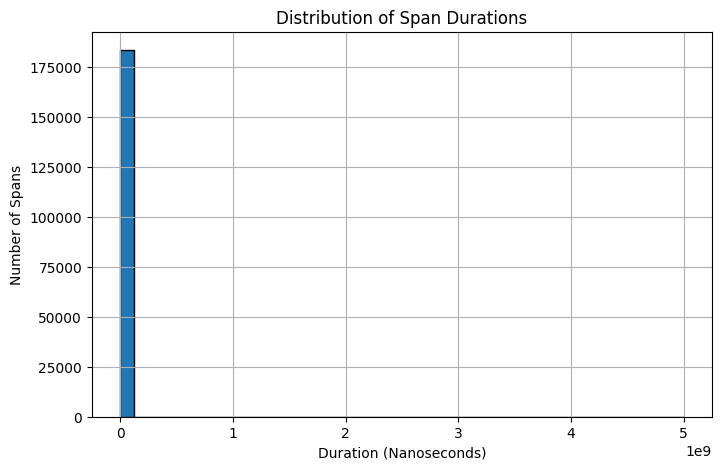

In [15]:
# Explore distribution of durations using a histogram
# This helps you visually assess the spread of durations and identify potential outliers or skewness

plt.figure(figsize=(8, 5))
plt.hist(df["durationNano"], bins=40, edgecolor="black")
plt.xlabel("Duration (Nanoseconds)")
plt.ylabel("Number of Spans")
plt.title("Distribution of Span Durations")
plt.grid(True)
plt.show()

**_Outliers_**


In [16]:
# Identify outliers in the duration of the span
# IQR (Interquartile Range) can be used to identify outliers
Q1 = df["durationNano"].quantile(0.25)
Q3 = df["durationNano"].quantile(0.75)
IQR = Q3 - Q1

In [17]:
# Any data point outside the range of 1.5 IQR below Q1 or 1.5 IQR above Q3 can be considered an outlier
outliers = df[
    (df["durationNano"] < (Q1 - 1.5 * IQR)) | (df["durationNano"] > (Q3 + 1.5 * IQR))
]
print("Number of outliers:", len(outliers))

Number of outliers: 18848


In [18]:
# Analyze the outliers
print(outliers)

       Timestamp                           traceID            spanID  \
3603     34:57.9  0a4c8b2a204f67623bcfbda629a07fc5  e399d5dba0602199   
3605     34:58.9  605b2ed4e56586df16602ef85673fc83  2da5f946176ae936   
3606     34:59.3  86d69278c14a4670bb1be847e7ea5184  af231ec03fdf53f2   
3607     34:59.9  7ccb42abf04c59bcf42ae9b992bcbbf9  84a19b54e2061b6e   
3609     35:00.9  3aeebc9a1f17e194d78f04d14977e58f  b620acf9768c3cd4   
...          ...                               ...               ...   
183570   44:50.6  874439d0e71fc74d17793c547998044c  dddd322b38ef9c1d   
183571   44:50.6  874439d0e71fc74d17793c547998044c  c554a8beba0d3053   
183573   44:50.6  d39c8d5c2028c57812ba31c2f2093b81  322a109a4f8c2b8f   
183595   44:51.0  4d45a4d63d5ec0498c01d532d077ef21  efa40483424b6f3d   
183606   44:52.0  4c92b326cfa6b2946247158a27d48e27  4da081ca72a46d33   

            parentSpanID    serviceName       Name  durationNano  \
3603                 NaN  loadgenerator   HTTP GET    2980831627   

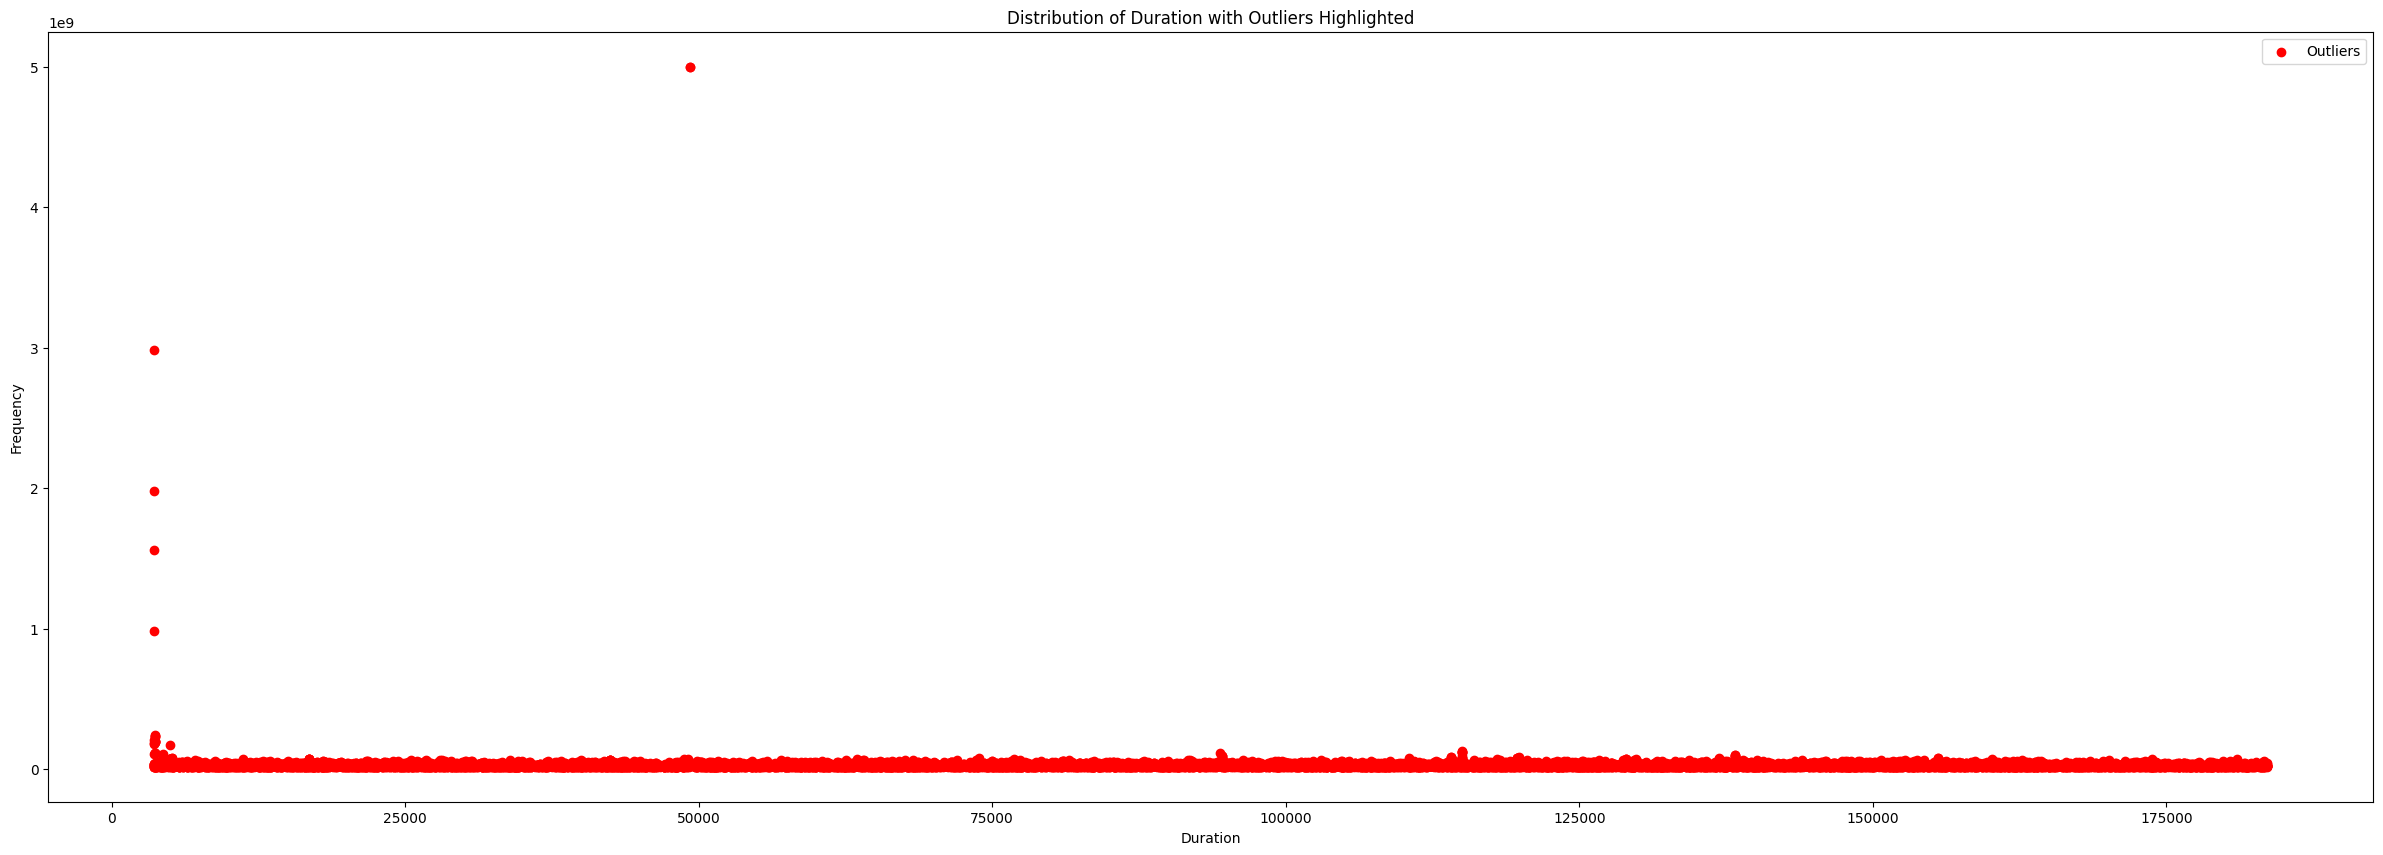

In [19]:
# Highlighting outliers
plt.figure(figsize=(30, 10))
plt.scatter(
    outliers.index, outliers["durationNano"], color="r", marker="o", label="Outliers"
)
plt.title("Distribution of Duration with Outliers Highlighted")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Number of outliers removed: 18848


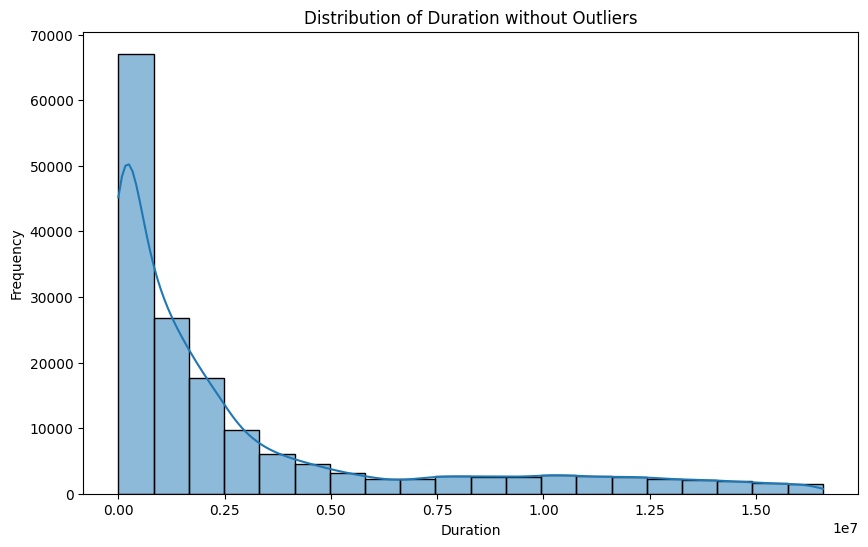

In [20]:
# Define the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df_no_outliers = df[
    (df["durationNano"] >= lower_bound) & (df["durationNano"] <= upper_bound)
]

# Print the number of outliers removed
num_outliers_removed = len(df) - len(df_no_outliers)
print("Number of outliers removed:", num_outliers_removed)

# Optionally, you can re-plot the histogram without outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers["durationNano"], bins=20, kde=True)
plt.title("Distribution of Duration without Outliers")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

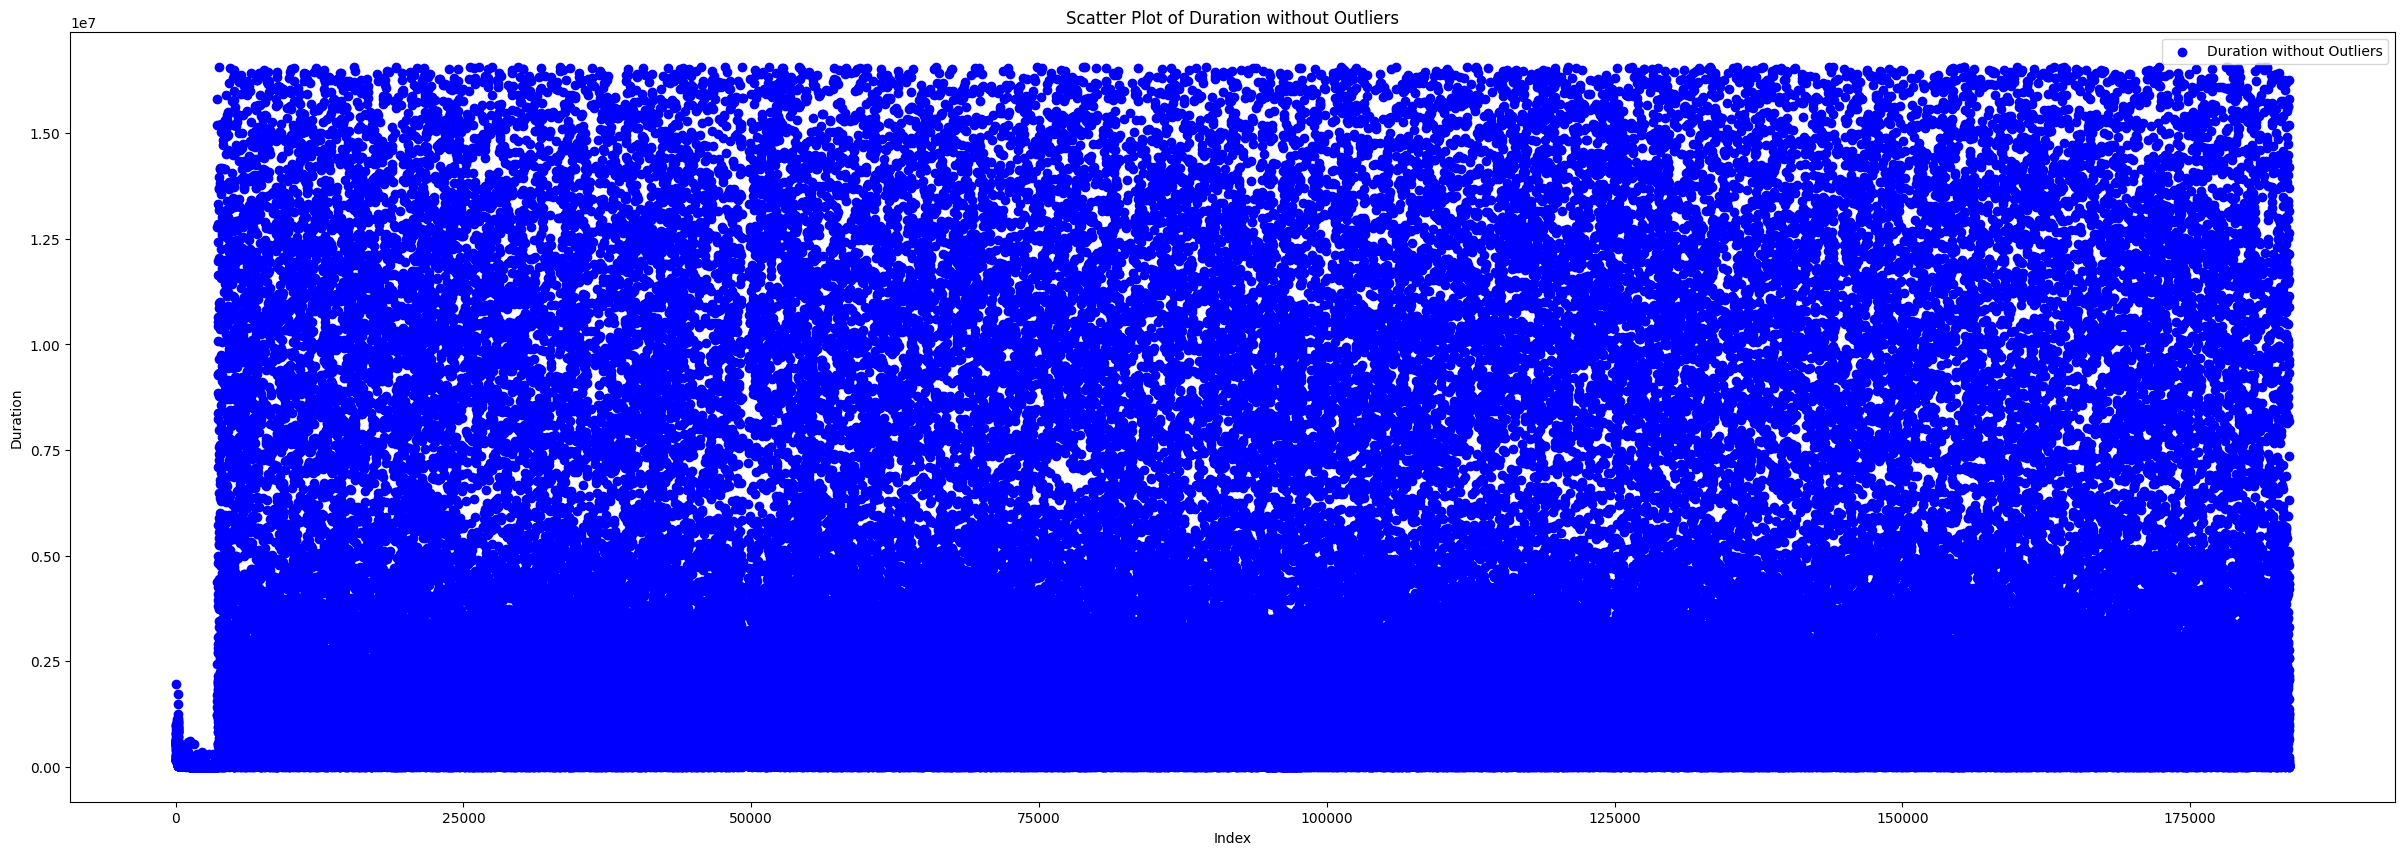

In [21]:
# To plot a scatter plot graph after removing outliers from the DataFrame
plt.figure(figsize=(30, 10))
plt.scatter(
    df_no_outliers.index,
    df_no_outliers["durationNano"],
    color="blue",
    label="Duration without Outliers",
)
plt.title("Scatter Plot of Duration without Outliers")
plt.xlabel("Index")
plt.ylabel("Duration")
plt.legend()
plt.show()

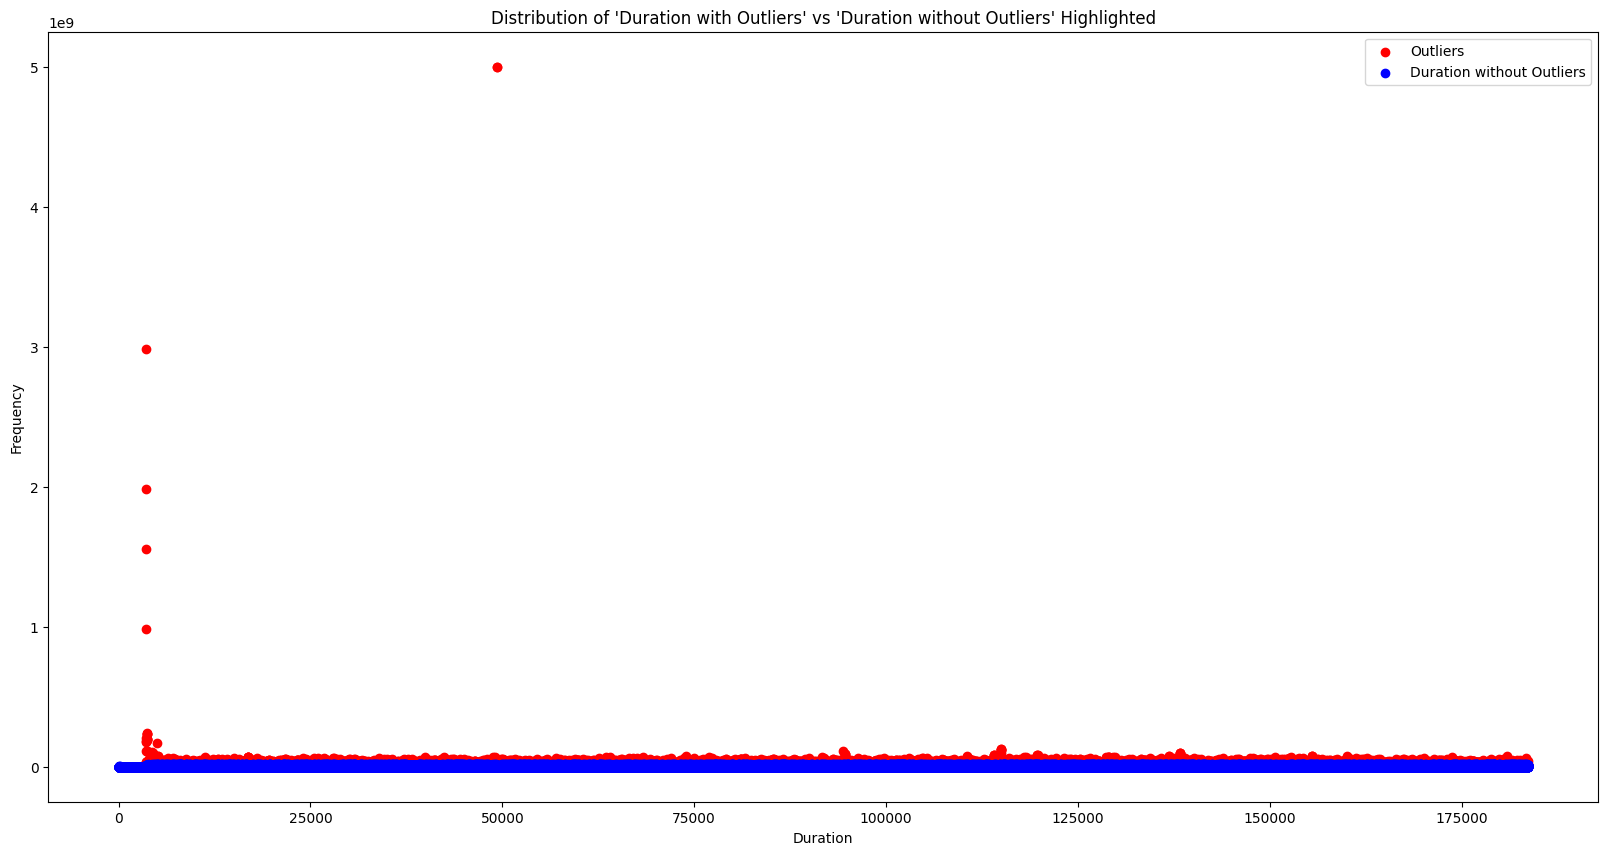

In [22]:
# The comprision between Duration with Outliers and Duration without Outliers.

plt.figure(figsize=(20, 10))
plt.scatter(
    outliers.index, outliers["durationNano"], color="r", marker="o", label="Outliers"
)
plt.scatter(
    df_no_outliers.index,
    df_no_outliers["durationNano"],
    color="blue",
    label="Duration without Outliers",
)
plt.title(
    "Distribution of 'Duration with Outliers' vs 'Duration without Outliers' Highlighted"
)
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**_We will analyze the duration of the span by service name by plotting bar charts._**


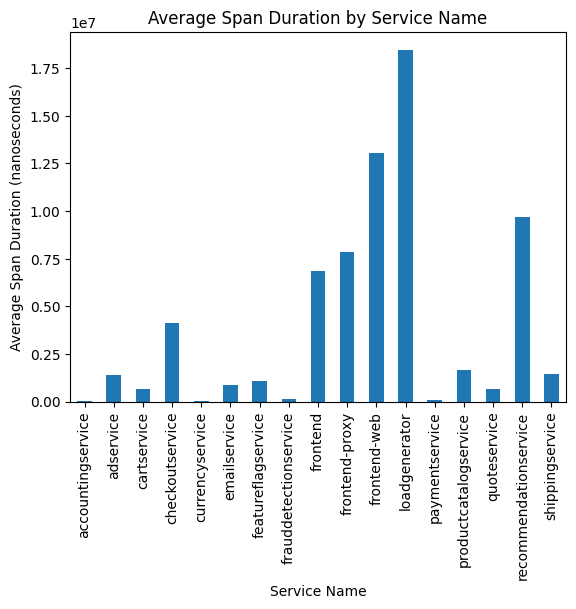

In [23]:
# Analyze duration of the span by service name
service_durations = df.groupby("serviceName")["durationNano"].mean()
service_durations.plot(kind="bar")
plt.xlabel("Service Name")
plt.ylabel("Average Span Duration (nanoseconds)")
plt.title("Average Span Duration by Service Name")
plt.show()

**_We will analyze the duration of the span by Name by plotting bar charts._**


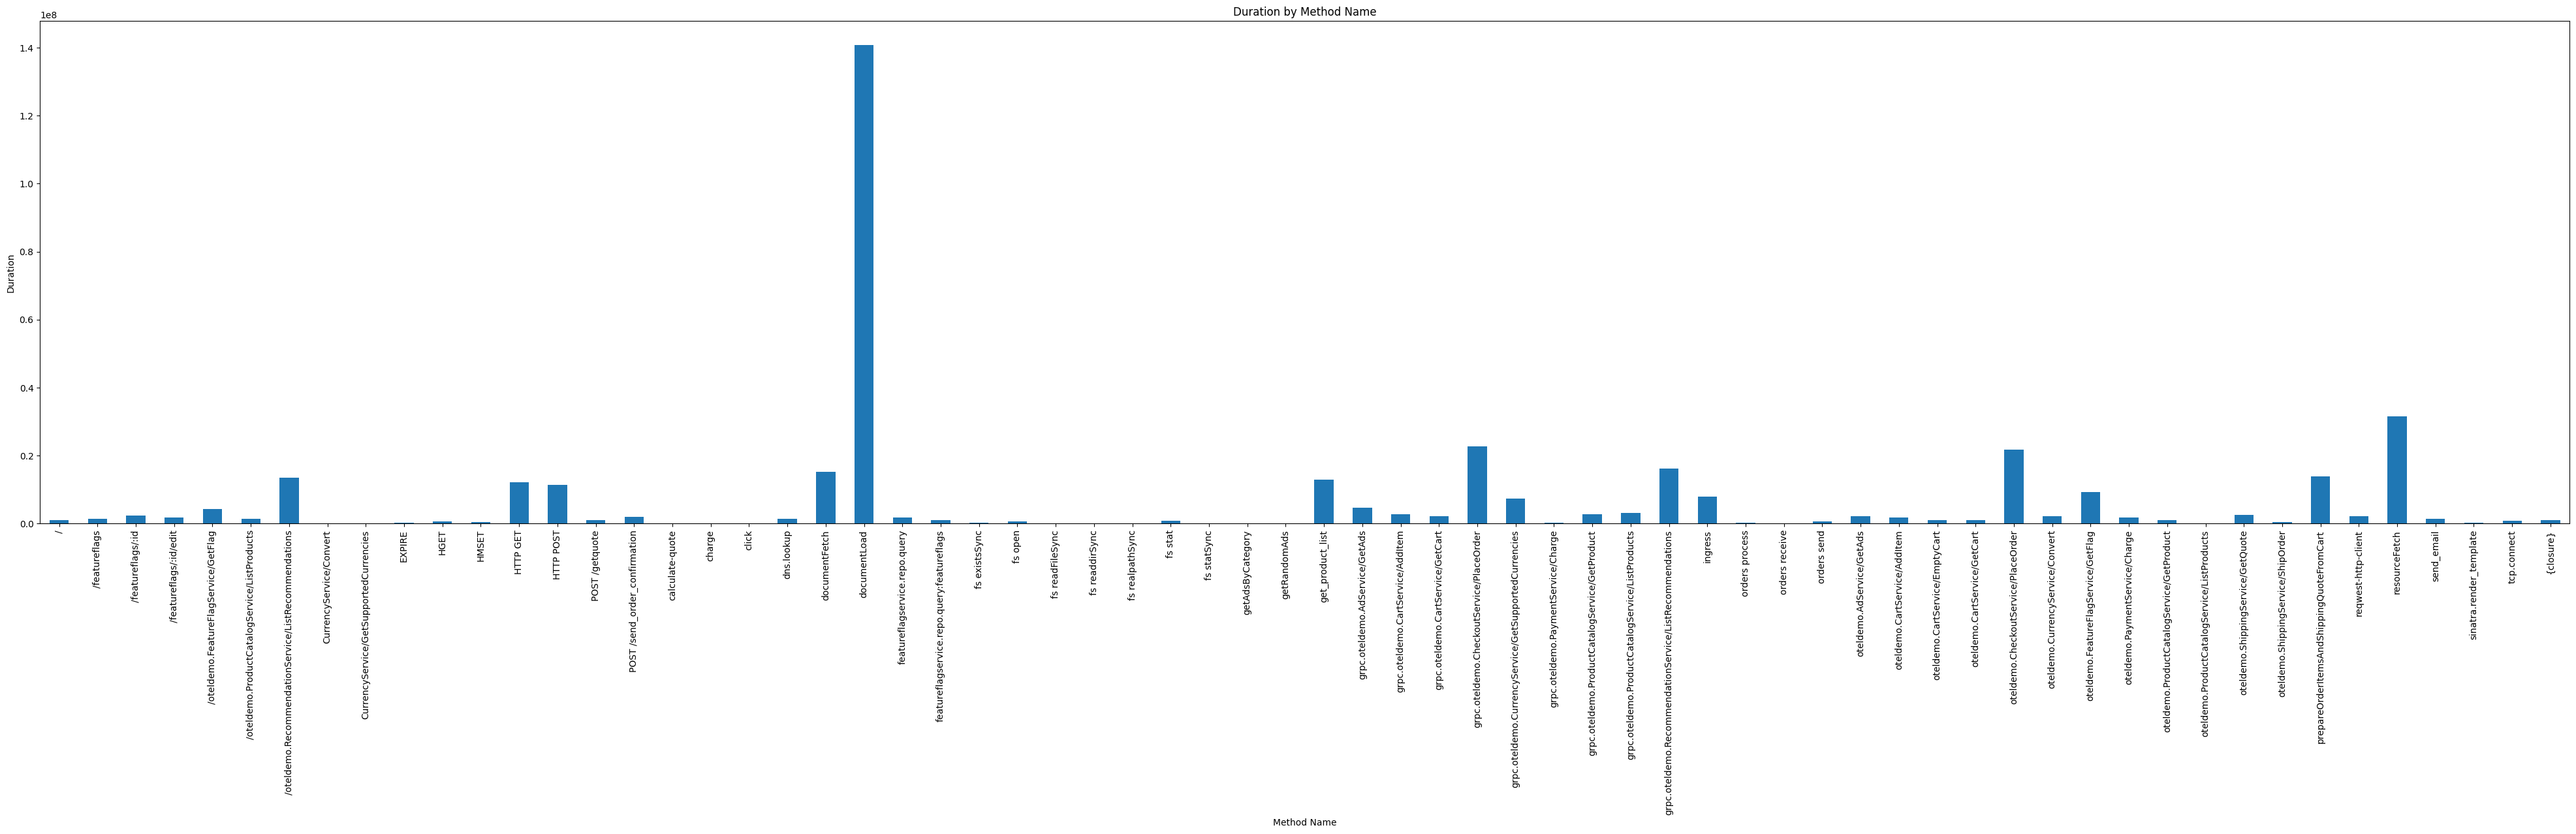

In [24]:
# Analyze duration by method name
plt.figure(figsize=(50, 10))
method_name = df.groupby("Name")["durationNano"].mean()
method_name.plot(kind="bar")
plt.title("Duration by Method Name")
plt.xlabel("Method Name")
plt.ylabel("Duration")
plt.xticks(rotation=90)
plt.show()

In [25]:
# Set a threshold for high durations (can be adjusted based on domain knowledge)
high_duration_threshold = df["durationNano"].quantile(0.95)

# Filter rows exceeding the threshold
potential_anomalies = df[df["durationNano"] > high_duration_threshold]

# Display potential anomalies
print(potential_anomalies)

       Timestamp                           traceID            spanID  \
3603     34:57.9  0a4c8b2a204f67623bcfbda629a07fc5  e399d5dba0602199   
3605     34:58.9  605b2ed4e56586df16602ef85673fc83  2da5f946176ae936   
3606     34:59.3  86d69278c14a4670bb1be847e7ea5184  af231ec03fdf53f2   
3607     34:59.9  7ccb42abf04c59bcf42ae9b992bcbbf9  84a19b54e2061b6e   
3615     35:00.9  e05754f6b1558aaeeecd1ca6a719eba4  a90b8faa2b14904c   
...          ...                               ...               ...   
183512   44:49.8  f633ad6fd54e12f9a63e9d5cde8eae2e  e1151ffb034b2699   
183524   44:50.0  4edf5aae1c441f0d4a4c6a577c169592  b5b2db85aeadcd55   
183542   44:50.1  03f64acedaad1de22d7ef8e6b2621b2b  b6c4a694517237c4   
183544   44:50.1  03f64acedaad1de22d7ef8e6b2621b2b  a19c6df9bbd32fad   
183606   44:52.0  4c92b326cfa6b2946247158a27d48e27  4da081ca72a46d33   

            parentSpanID    serviceName       Name  durationNano  \
3603                 NaN  loadgenerator   HTTP GET    2980831627   

- we attempt to identify potentially anomalous spans based on their durations.
- We set a threshold using the 95th percentile of the 'durationNano' column (quantile(0.95)).
- This threshold represents the duration above which only 5% of spans fall.
